1. Марковская цепь $(\xi_n,n\in{\mathbb Z}_{+})$ имеет начальное состояние $\xi_0=0$ и переходные вероятности ${\sf P}(\xi_{n+1}=k+1|\;\xi_{n}=k)=p$, ${\sf P}(\xi_{n+1}=k|\;\xi_{n}=k)=1-p$, $k,n\in{\mathbb N}$, $p\in[0,1]$. Найдите распределение $\xi_n$. Докажите, что последовательность $\tau_0=0$, $\tau_{k}=\min\{n:\;\xi_n=k\}$ также является цепью Маркова и найдите ее переходные вероятности.

2. Пусть $\{\xi_n,n\in\mathbb{Z}_+\}$ --- марковская цепь с фазовым пространством $S=\{1, ..., N\}$ и матрицей переходных вероятностей
$$
\begin{pmatrix}
q & p & 0 & 0 & ... & 0\\
q & 0 & p & 0 & ... & 0\\
q & 0 & 0 & p & ... & 0 \\
... \\
q & 0 & 0 & 0 & ... & p \\
1 & 0 & 0 & 0 & ... & 0
\end{pmatrix},
$$
где $0 < p < 1, q = 1-p$. Нарисуйте граф, соответствующей данной марковской цепи, и найдите предельное распределение.

3. Приведите пример такой однородной марковской цепи с дискретным временем, что

* у нее есть ровно одно стационарное распределение, но нет предельного;
* у нее все распределения являются стационарными, но нет предельного;
* у нее нет стационарного распределения, но есть пределы переходных вероятностей при $n\to\infty$.


Докажите, что если однородная марковская цепь с дискретным временем имеет несколько стационарных распределений, то их, на самом деле, бесконечно много.

4. Пусть в модели PageRank пользователь браузера в дополнение к кликам по ссылкам один раз может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: V = $\{url_i\}_i.$
* Начальное распределение: $\Pi(0)$ &mdash; некоторое начальное распределение.
* Переходные вероятности: пусть $N_i$ &mdash; количество ссылок на странице $i$. Тогда:
\begin{equation*}
p_{ij} = 
 \begin{cases}
   \frac{1 - p}{N_i} + \frac{p}{|V|} &(url_i, url_j) \in E; \\
   \frac{p}{|V|} &(url_i, url_j) \notin E; \\
   \frac{1}{|V|}, N_i = 0.
 \end{cases}
\end{equation*}

#### Вычисление

Данная марковская цепь является эргодической. Почему?

Потому что выполняются условия эргодической теоремы: матрица переходных вероятностей $P^n$ имеет ненулевые элементы при $n = 1$.

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left\lVert\Pi^{(k)} - \Pi^{(k - 1)}\right\rVert > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

Нет, так как по условиям эргодической теоремы мы с любого начального распределения стремимся к $\Pi.$

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

С точки зрения практического применения, как мне кажется, имеет смысл посмотреть, на сколько близки распределения $Pi^{(k)}_1$ и $Pi^{(k)}_2$ для разных начальных распределений $\Pi^{(0)}_1$ и $\Pi^{(0)}_2.$ Если они близки, значит, скорее всего, действительно, мы движемся к искомому предельному распределению.

Какая верхняя оценка на скорость сходимости?

$O\left(\left(1 - \frac{p}{|V|}\right)^n\right).$

## Часть 1


In [296]:
import numpy as np
import scipy.stats as sps
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

In [217]:
X = np.array([[1, 2, 3]])
np.repeat(X, axis=0, repeats=2)

array([[1, 2, 3],
       [1, 2, 3]])

In [282]:
def create_page_rank_markov_chain(links, N, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links, dtype=int)
    
    edges = np.zeros(shape=(N, N))
    
    for link in links:
        edges[link[0], link[1]] = 1
        
    N_j = np.sum(edges, axis=1).reshape((1, -1))
    
    prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges, 
                                          nan=(1 - damping_factor) / N) + damping_factor / N)
    
    return prob_matrix


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False, max_iter=None):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения  start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    N = int(start_distribution.shape[1])  # Число веб-страниц.
    
    prob_matrix = create_page_rank_markov_chain(links, damping_factor=damping_factor, N=N)
    distribution = np.matrix(start_distribution)
    
    if return_trace:
        trace = np.array([start_distribution])
    
    prev_distribution = np.zeros(shape=distribution.shape)
    
    n_iter = 0
    while np.linalg.norm((distribution - prev_distribution)) > tolerance:
        
        next_distribution = distribution @ prob_matrix
        prev_distribution = distribution
        distribution = next_distribution
        if return_trace:
            trace = np.concatenate((trace, [distribution]), axis=1)
        
        n_iter += 1
        if max_iter is not None:
            if n_iter >= max_iter:
                break
        
    if return_trace:
        trace = trace.reshape(trace.shape[1], -1)
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

**Автоматическая проверка**

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием `c2.N.py` и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [223]:
def random_graph(n, p):
    
    return np.array(list(product(np.linspace(0, n - 1, n), repeat=2)))[bernoulli(p).rvs(n ** 2) == 1]


Теперь сгенерируем случайный граф и нарисуем его.

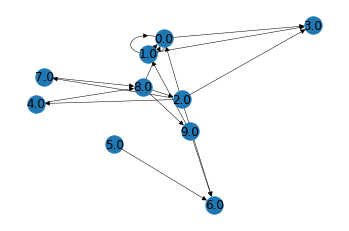

In [312]:
N, p = 10, 0.15
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

Wall time: 57 ms


C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


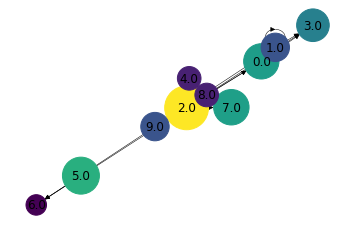

In [313]:
%%time
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


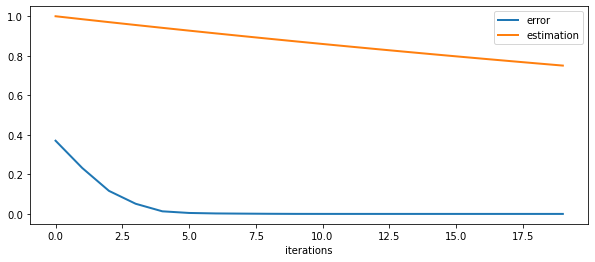

In [314]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, return_trace=True)

errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - (0.15 / pr_distribution.shape[0])) ** x, lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

**Вывод:** как видно, скорость сходимости на самом больше, чем оценочная. Это означает, что, скорее всего, на самом деле нам понадобится меньше итераций, чем мы считаем, когда оцениваем точность.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

Зависимость от $n$:

In [318]:
N_grid = np.linspace(1, 100, 100, dtype=int)

tot_iters = []
for N in tqdm(N_grid):
    edges = random_graph(N, p)
    start_distribution = np.ones((1, N)) / N
    pr_distribution, pr_trace = page_rank(edges, start_distribution, return_trace=True)
    tot_iters.append(pr_trace.shape[0] - 1)

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


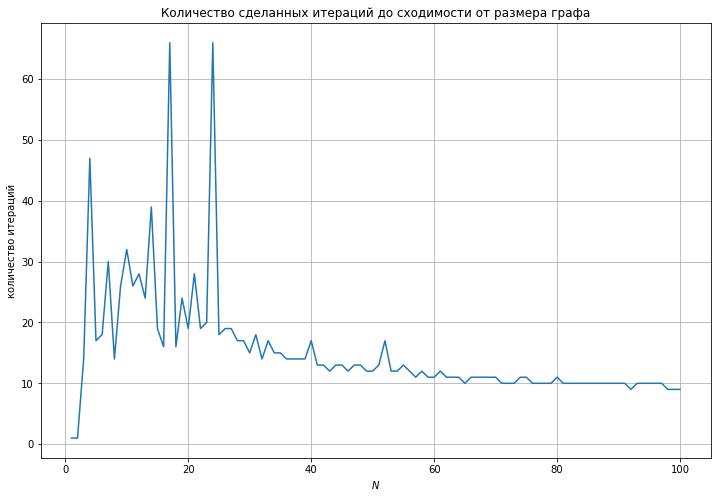

In [319]:
plt.figure(figsize=(12, 8))
plt.plot(N_grid, tot_iters)
plt.xlabel('$N$')
plt.ylabel('количество итераций')
plt.title('Количество сделанных итераций до сходимости от размера графа')
plt.grid()

In [328]:
p_grid = np.linspace(0.01, 0.99, 99)
N = 10

tot_iters = []
for p in tqdm(p_grid):
    edges = random_graph(N, p)
    start_distribution = np.ones((1, N)) / N
    pr_distribution, pr_trace = page_rank(edges, start_distribution, return_trace=True)
    tot_iters.append(pr_trace.shape[0] - 1)

  0%|          | 0/99 [00:00<?, ?it/s]

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


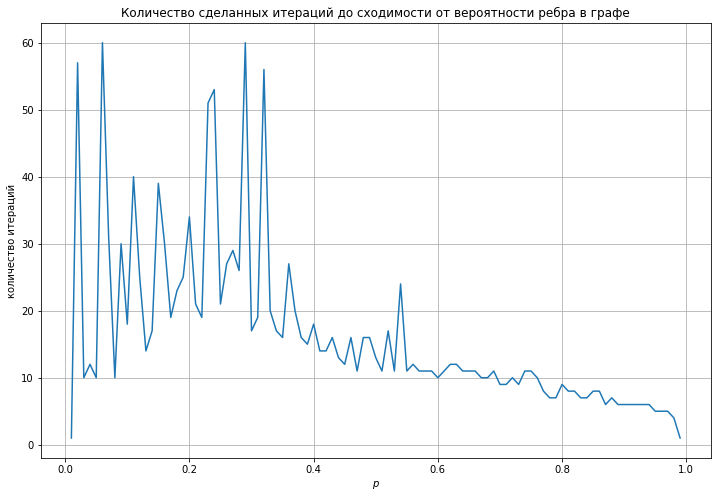

In [330]:
plt.figure(figsize=(12, 8))
plt.plot(p_grid, tot_iters)
plt.xlabel('$p$')
plt.ylabel('количество итераций')
plt.title('Количество сделанных итераций до сходимости от вероятности ребра в графе')
plt.grid()

**Вывод:** на самом деле, непонятно, какая зависимость. И в одном, и в другом случае мы получили сильно скачущий график, который в основном сильно меняется в первой половине, а во второй почти монотонно убывает. Это значит, что при довольно больших $n$ и $p$ с их ростом количество сделанных итераций с большой вероятностью уменьшится.

## Часть 2

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [267]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [231]:
urls = ['http://wikipedia.org/wiki/']
site = get_site(urls[0])
links = []

N = 10
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

In [190]:
links

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 18),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100)

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000).
Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

Так как на большом количестве страниц (больше 200) получается каша при визуализации графов, то возьмем 200 страниц.

In [234]:
urls = ['https://news.sportbox.ru/']
site = get_site(urls[0])
links = []

N = 200
for i in tqdm(range(N)):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            elif len(urls) < N:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

  0%|          | 0/200 [00:00<?, ?it/s]

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
The read operation timed out
<urlopen error timed out>
<urlopen error timed out>
<urlopen error timed out>
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
The read operation timed out
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavailable
HTTP Error 503: Service Temporarily Unavai

In [236]:
links

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 0),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 

In [237]:
links = np.array(links)
np.max(links, axis=0)

array([199, 199])

Полный веб-граф.

Wall time: 32.9 s


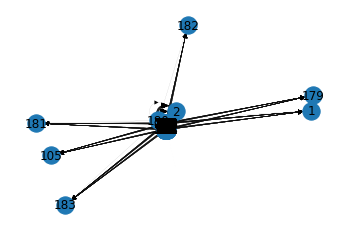

In [238]:
%%time
G = networkx.DiGraph()
G.add_edges_from(links)
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/4038528919.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/4038528919.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


Wall time: 40.4 s


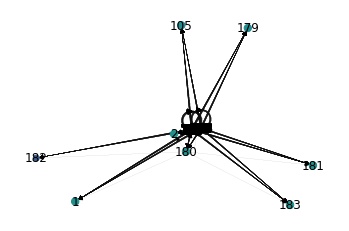

In [240]:
%%time
N = np.max(links, axis=0)[1] + 1
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(links, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

No handles with labels found to put in legend.


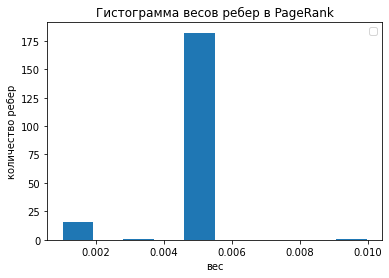

In [242]:
plt.hist(pr_distribution, bins=10)
plt.xlabel('вес')
plt.ylabel('количество ребер')
plt.title('Гистограмма весов ребер в PageRank')
plt.legend()
plt.show()

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/4038528919.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/4038528919.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


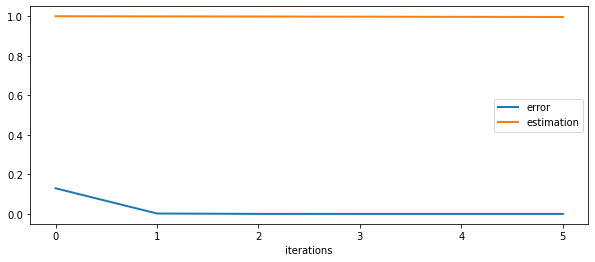

In [243]:
pr_distribution, pr_trace = page_rank(links, start_distribution, 
                                      return_trace=True)

errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - (0.15 / pr_distribution.shape[0])) ** x, lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Как видно, мы сходимся очень быстро (за 1 итерацию уже почти нужная точность).

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

In [255]:
N = 15
most_valuable_pages = np.argsort(pr_distribution)[-N:]
most_valuable_pages

array([ 71,  29,  28,  27, 154,  15,  25, 152, 151, 150,  17, 180,  24,
       167, 123], dtype=int64)

In [259]:
dict_pages = {
    most_valuable_pages[i]: i for i in range(N)
}
dict_pages

{71: 0,
 29: 1,
 28: 2,
 27: 3,
 154: 4,
 15: 5,
 25: 6,
 152: 7,
 151: 8,
 150: 9,
 17: 10,
 180: 11,
 24: 12,
 167: 13,
 123: 14}

In [260]:
N = 15
most_valuable_pages = np.argsort(pr_distribution)[-N:]

big_links = []
for link in links:
    if link[0] in most_valuable_pages and link[1] in most_valuable_pages:
        new_link = [dict_pages[link[0]], dict_pages[link[1]]]
        big_links.append(new_link)
        
big_links

[[5, 5],
 [5, 10],
 [5, 12],
 [5, 6],
 [5, 3],
 [5, 2],
 [5, 1],
 [5, 0],
 [5, 14],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 4],
 [5, 13],
 [5, 11],
 [5, 5],
 [5, 14],
 [5, 14],
 [5, 14],
 [10, 5],
 [10, 10],
 [10, 12],
 [10, 6],
 [10, 3],
 [10, 2],
 [10, 1],
 [10, 0],
 [10, 14],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 4],
 [10, 13],
 [10, 11],
 [10, 14],
 [12, 5],
 [12, 10],
 [12, 12],
 [12, 6],
 [12, 3],
 [12, 2],
 [12, 1],
 [12, 0],
 [12, 14],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 4],
 [12, 13],
 [12, 11],
 [12, 12],
 [12, 14],
 [12, 14],
 [12, 14],
 [6, 5],
 [6, 10],
 [6, 12],
 [6, 6],
 [6, 3],
 [6, 2],
 [6, 1],
 [6, 0],
 [6, 14],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 4],
 [6, 13],
 [6, 11],
 [6, 6],
 [6, 14],
 [6, 14],
 [6, 14],
 [3, 5],
 [3, 10],
 [3, 12],
 [3, 6],
 [3, 3],
 [3, 2],
 [3, 1],
 [3, 0],
 [3, 14],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 4],
 [3, 13],
 [3, 11],
 [3, 3],
 [3, 14],
 [3, 14],
 [3, 14],
 [2, 5],
 [2, 10],
 [2, 12],
 [2, 6],
 [2, 3],
 [2, 2],
 [2, 1],
 [2, 0],
 [2, 14],
 [2, 9],
 [2, 

Wall time: 363 ms


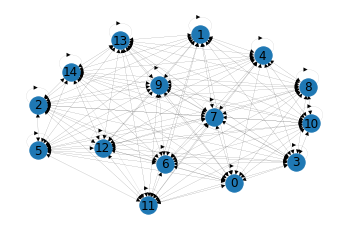

In [261]:
%%time
G = networkx.DiGraph()
G.add_edges_from(big_links)
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

Wall time: 369 ms


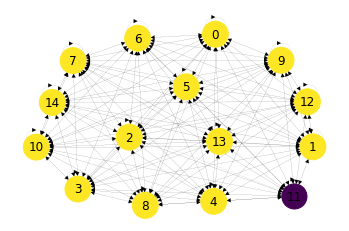

In [262]:
%%time
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(big_links, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

In [265]:
for page in most_valuable_pages:
    print(urls[page])

https://news.sportbox.ru/Vidy_sporta/Hokkej/world-championship-u20
https://news.sportbox.ru/Vidy_sporta/Futbol/Evropejskie_chempionaty/Shotlandija
https://news.sportbox.ru/Vidy_sporta/Futbol/Evropejskie_chempionaty/Portugalija
https://news.sportbox.ru/Vidy_sporta/Futbol/Evropejskie_chempionaty/Pol_sha
https://news.sportbox.ru/olympics/Pekin_2022
https://news.sportbox.ru/Vidy_sporta/Futbol/Superleague
https://news.sportbox.ru/Vidy_sporta/Futbol/Evropejskie_chempionaty/Grecija
https://news.sportbox.ru/Vidy_sporta/Avtosport/Dakar
https://news.sportbox.ru/Vidy_sporta/Avtosport/Formula_3
https://news.sportbox.ru/Vidy_sporta/Avtosport/Formula_2
https://news.sportbox.ru/Vidy_sporta/Futbol/stats/reiting_259
http://news.sportbox.ru/domru
https://news.sportbox.ru/Vidy_sporta/Futbol/Evropejskie_chempionaty/Belorussia
https://news.sportbox.ru/Koronavirus
https://news.sportbox.ru


Среди этих страниц есть главная страница. Также есть страницы, которые действительно часто посещают (про коронавирус, молодежный чм по хоккею, олимпиаду в Пекине), но есть и страницы, которые посещают довольно редко, что говорит о несовершенстве метода.

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

In [299]:
N = 200
start_distribution = np.abs(sps.cauchy.rvs(size=N))
start_distribution = start_distribution / np.sum(start_distribution)
start_distribution[:5]

array([1.79015149e-03, 3.46085626e-04, 1.33040345e-05, 4.98478958e-04,
       5.65556540e-01])

In [308]:
start_distribution_uniform = np.ones((1, N)) / N
pr_distribution_uniform = page_rank(links, start_distribution_uniform, max_iter=3)
pr_distribution_uniform[:5]

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


array([0.00530447, 0.00548374, 0.00548374, 0.00530447, 0.00530447])

In [309]:
pr_distribution = page_rank(links, start_distribution.reshape(1, -1), max_iter=3)
pr_distribution[:5]

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


array([0.0053046 , 0.00548368, 0.00548368, 0.0053046 , 0.0053046 ])

In [310]:
diff = []
for max_iter in np.linspace(1, 10, 10):
    pr_distribution_uniform = page_rank(links, start_distribution_uniform, max_iter=max_iter)
    pr_distribution = page_rank(links, start_distribution.reshape(1, -1), max_iter=3)
    diff.append(np.linalg.norm(pr_distribution - pr_distribution_uniform))

C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: divide by zero encountered in true_divide
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,
C:\Users\poloz\AppData\Local\Temp/ipykernel_7680/2078165491.py:21: RuntimeWarning: invalid value encountered in multiply
  prob_matrix = np.matrix(np.nan_to_num((1 - damping_factor) / np.repeat(N_j, axis=0, repeats=N).T * edges,


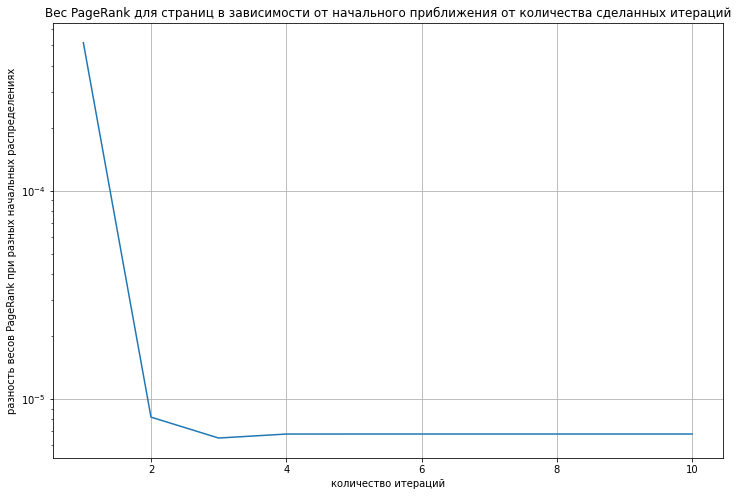

In [311]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, 10, 10), diff)
plt.xlabel('количество итераций')
plt.ylabel('разность весов PageRank при разных начальных распределениях')
plt.title('Вес PageRank для страниц в зависимости от начального приближения от количества сделанных итераций')
plt.grid()
plt.yscale('log')

Если модель и вправду работает, то уже после пары итераций пользователи себя ведут похожим образом, так как начальные распределения были взяты совсем разные (одно из них - нормированное Коши, которое сильно подвержено выбросам).